In [1]:
import numpy as np
import pandas as pd
import matplotlib
print(matplotlib.__version__)
matplotlib.use('PDF')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.lines as mlines
from glob import glob
from collections import Counter
import ns
import history_cmc as hic
import math
import scipy
from scipy import stats
import matplotlib.cm as cm
import matplotlib as mpl
import random
from random import shuffle
import ecc_calc as gwcalc
import unit_convert as uc
import merger_rate_calculator as mr
import NS_tidalcapture as tc
import psr_catalog as pc


%matplotlib inline

matplotlib.rcParams.update({'font.size': 24})
      
twopi=2.*np.pi
yearsc=3.1557*10**7
Kconst=9.87*10**-48 ##yr/G^2
Gconst=6.674*10**-8 ##cm3*g-1*s-2
clight=3*10**10 ##cm/s
Msun=2*10**33 ##gram
AU=1.496*10**13  ##cm
PC=3.086*10**18  ##cm

savepath='/projects/b1095/syr904/projects/PULSAR2/tc_comparison/'

2.1.2


[-4.985e-20, -3.4289999999999996e-21, 9.851e-20, 6.45e-20, -4.2149999999999997e-20, -1.83e-21, -4.587e-20, -9.792199999999999e-21, -1.2206e-19, -3.8439999999999995e-20, -2.1869999999999998e-20, 3.0354e-20, 3.402e-20, 1.48371e-19, -2.0539999999999997e-20, 2.937e-19, 9.522999999999999e-20, -8.6553e-20, 1.83609e-20, -3.5171999999999996e-20, -4.56e-21, -4.589e-20, 9.844e-21, 1.17e-21, 2.7e-20, 2.7e-20, 1.858e-20, 4.1219999999999994e-20, -3.3e-21, 2.6055e-20, -5.4693e-20, -1.3195999999999998e-19, -3.4978e-19, -6.378e-20, 1.2569999999999998e-19, 3.103e-19, 2.221e-19, 1.5900000000000002e-15, 1.68e-19, -3.4e-20, -6.06e-19, 1.41232e-19, 8.8495e-20, 3.9933000000000007e-16, -3.2912999999999994e-19, -5.984e-20, 5.8678e-19, 3.1239999999999997e-19, -1.0549999999999998e-20, 5.661e-18, 1.92e-20, -9.96e-19, 4.928e-19, -5.131e-19, 2.1909999999999997e-18, -6.499999999999999e-20, 6.899999999999999e-21, 4.7e-19, -4.335e-21, 8.232449999999999e-20, 3.3849999999999997e-18, 3.15e-17, 2.2400000000000004e-16, 1.

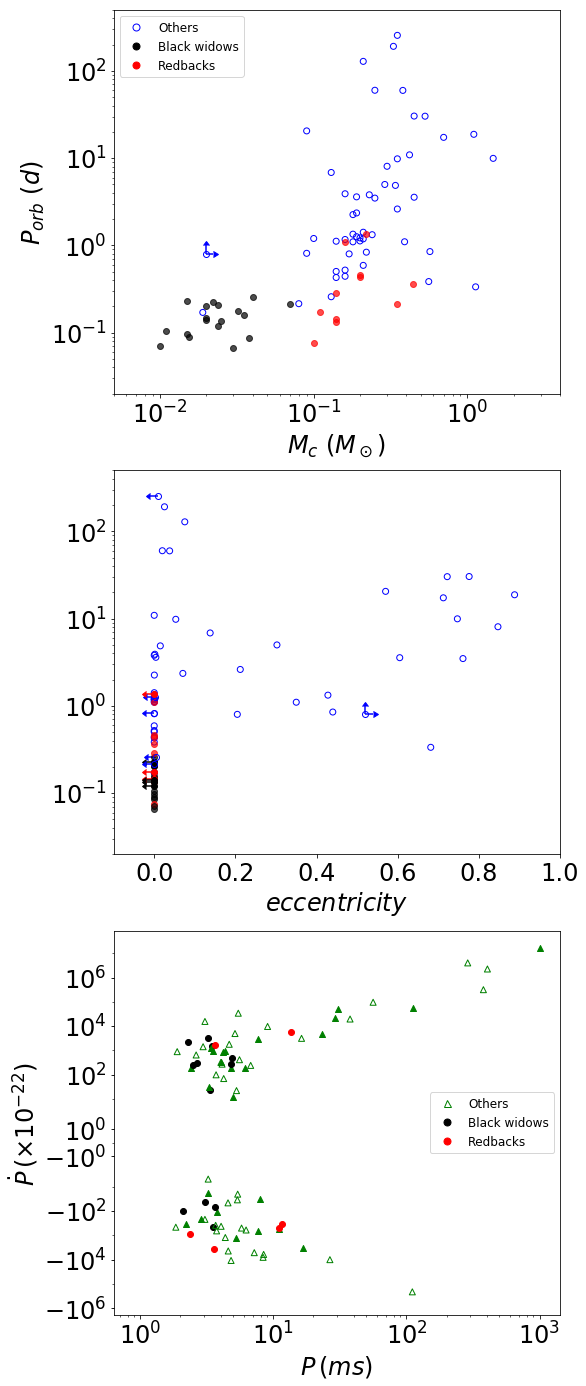

In [21]:
P, Pdot, Binflag, Namespin, Period, Ecc, Mc, Names = pc.readdata_freire()
datarb=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR/GCredback.dat', dtype=str)
databw=np.genfromtxt('/projects/b1095/syr904/projects/PULSAR/GCblackwidow.dat', dtype=str)
namerb=datarb[:,0]; namebw=databw[:,0]

plt.rcParams['figure.figsize'] = [8,24]
rdot=mlines.Line2D([], [],  linestyle = 'None', color='r', marker='o',
                  markersize=7, label='Redbacks')
kdot=mlines.Line2D([], [],  linestyle = 'None', color='k', marker='o',
                  markersize=7, label='Black widows')
bdot=mlines.Line2D([], [],  linestyle = 'None', color='b', marker='o',
                  markersize=7, markerfacecolor='none', label='Others')
gtri=mlines.Line2D([], [],  linestyle = 'None', color='g', marker='^',
                  markersize=7, markerfacecolor='none', label='Others')

fig, axs = plt.subplots(nrows=3, sharey=False)
fig.subplots_adjust(wspace=0.05)
for i in range(len(Mc)):
    if Mc[i][0] != '>':
        if Names[i] in namerb:
            axs[0].scatter(float(Mc[i]), float(Period[i]), color='red', alpha=0.7, zorder=2)
            if Ecc[i][0]!='<':
                axs[1].scatter(float(Ecc[i]), float(Period[i]),  color='red', alpha=0.7, zorder=2)
            else:
                axs[1].errorbar(float(Ecc[i].split('<')[1]), float(Period[i]), xerr=0.02, 
                                xuplims=True,  marker='o', color='red', linestyle='none')
                
            
        elif Names[i] in namebw:
            axs[0].scatter(float(Mc[i]), float(Period[i]), color='k', alpha=0.7, zorder=2)
            if Ecc[i][0]!='<':
                axs[1].scatter(float(Ecc[i]), float(Period[i]), color='k', alpha=0.7, zorder=2)
            else:
                axs[1].errorbar(float(Ecc[i].split('<')[1]), float(Period[i]), xerr=0.02, 
                                xuplims=True,  marker='o', color='k', linestyle='none')
                
            
        else:
            axs[0].scatter(float(Mc[i]), float(Period[i]), color='b', facecolors='none', zorder=1)
            if Ecc[i][0]!='<':
                axs[1].scatter(float(Ecc[i]), float(Period[i]), color='b', facecolors='none', zorder=1)
            else:
                axs[1].errorbar(float(Ecc[i].split('<')[1]), float(Period[i]), xerr=0.02, 
                                xuplims=True,  marker='o', markerfacecolor='none', color='b', linestyle='none')
                
    
    else:
        axs[0].errorbar(float(Mc[i].split('>')[1]), float(Period[i].split('>')[1]), xerr=0.002, yerr=0.2, lolims=True, 
                        xlolims=True, marker='o', markerfacecolor='none', color='b', linestyle='none')
        axs[1].errorbar(float(Ecc[i].split('>')[1]), float(Period[i].split('>')[1]), xerr=0.02, yerr=0.2, lolims=True, 
                        xlolims=True, marker='o', markerfacecolor='none', color='b', linestyle='none')
        

for j in range(len(P)):
    if Binflag[j]==0:
        axs[2].scatter(float(P[j]), float(Pdot[j])*10**22, marker='^', facecolor='none', color='g')
    else:
        if Namespin[j] in namerb:
            axs[2].scatter(float(P[j]), float(Pdot[j])*10**22, marker='o', color='r')
        elif Namespin[j] in namebw:
            axs[2].scatter(float(P[j]), float(Pdot[j])*10**22, marker='o', color='k')
        else:
            axs[2].scatter(float(P[j]), float(Pdot[j])*10**22, marker='^', color='g')
            
        
    

axs[0].set_yscale('log')
axs[0].set_xscale('log')
axs[0].set_ylim(0.02, 500)
axs[0].set_xlim(0.005, 4)
axs[0].set_xlabel(r'$M_c\ (M_\odot)$')
axs[0].set_ylabel(r'$P_{orb}\ (d)$')
axs[0].legend(handles=[bdot, kdot, rdot], loc='upper left', prop={'size': 12}, numpoints=1, frameon=True)

axs[1].set_yscale('log')
#axs[1].set_xscale('symlog')
axs[1].set_ylim(0.02, 500)
axs[1].set_xlim(-0.1, 1)
axs[1].set_xlabel(r'$eccentricity$')
#axs[1].set_ylabel(r'$P_{orb}\ (d)$')

axs[2].set_yscale('symlog')
axs[2].set_xscale('log')
axs[2].legend(handles=[gtri, kdot, rdot], loc='center right', prop={'size': 12}, numpoints=1, frameon=True)
axs[2].set_xlabel(r'$P\,(ms)$')
axs[2].set_ylabel(r'$\dot{P}\,(\times 10^{-22})$')
axs[2].locator_params(numticks=8)
yticks =plt.gca().yaxis.get_major_ticks()
yticks[4].set_visible(False)